<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [339]:
# YOUR CODE HERE
import pandas as pd

past = pd.read_csv('../dat/past.csv.gz')
past

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5550.000000,15.840000,15.840000,0.000000,1.333333,0.000000,...,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0,0.000000,1.000000
1,5647110,5.326529e+08,2.250000,1.500000,27556.500000,5.800000,5.565000,1.250000,0.250000,0.250000,...,0.250000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0,0.000000,1.000000
2,5790472,4.578109e+08,1.000000,1.000000,0.000000,6.272500,6.272500,0.250000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0,0.000000,1.000000
3,5811598,4.612641e+08,1.500000,1.500000,131532.500000,5.560000,5.560000,0.250000,1.000000,0.250000,...,0.250000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0,0.250000,1.000000
4,5846363,5.157993e+08,1.875000,1.375000,11055.875000,4.086250,4.086250,0.500000,1.000000,0.250000,...,0.250000,0.375000,0.000000,0.125000,0.250000,0.250000,0.000000,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5610082,5.853313e+08,1.500000,1.000000,77.000000,0.790000,0.790000,0.500000,0.500000,0.000000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4996,5770265,5.124349e+08,1.954545,1.363636,348649.090909,2.972727,2.972727,0.636364,0.681818,0.590909,...,0.272727,0.136364,0.045455,0.181818,0.409091,0.045455,0.090909,1,0.090909,1.045455
4997,5923106,4.427739e+08,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4998,5889691,6.104029e+08,2.000000,1.000000,766.000000,8.250000,8.250000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000


<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

There are no missing values in the `Purchased?` column.

In [340]:
past['Purchased?'].isna().sum()

0

In [341]:
# YOUR CODE HERE
print(f"Percentage of interaction that resulted in purchase: {100*past['Purchased?'].mean()}%")

Percentage of interaction that resulted in purchase: 34.38%


The data is slightly imbalanced with the `Purchased?=1` being the minority class at 34%

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [342]:
# YOUR CODE HERE
X = past.drop(columns=['product_id', 'user_id'])

# YOUR CODE HERE
y = X.pop('Purchased?')

Checking that the `Purchased?` column was indeed popped. 

In [343]:
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

In [344]:
X.columns

Index(['NumOfEventsInJourney', 'NumSessions', 'interactionTime', 'maxPrice',
       'minPrice', 'NumCart', 'NumView', 'NumRemove', 'InsessionCart',
       'InsessionView', 'InsessionRemove', 'Weekend', 'Fr', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed', '2019', '2020', 'Jan', 'Feb', 'Oct', 'Nov',
       'Dec', 'Afternoon', 'Dawn', 'EarlyMorning', 'Evening', 'Morning',
       'Night', 'Noon', 'Category'],
      dtype='object')

In [345]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [346]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

pca = PCA(n_components=5)
pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)
print(f"{pca.explained_variance_ratio_}")

#[0.10282143 0.09445651 0.06515188 0.05030046 0.04037809]
#[0.10282069 0.09445599 0.06500679 0.05103953 0.04195558]

[0.10282301 0.09445624 0.06515221 0.05130837 0.04302426]


In [347]:
assert X_reduced.shape == (5000, 5)

In [348]:
pd.DataFrame(X_reduced)

,0,1,2,3,4
0,0.567670,-1.682684,1.115327,0.091399,0.863143
1,0.450548,0.009238,-0.589681,0.159312,0.571906
2,-0.161437,-1.152036,-0.456199,-0.328493,-1.200384
3,0.162334,-0.471852,0.163641,-0.874167,-1.186792
4,-0.993929,0.148489,-0.124195,-0.575692,-0.334370
...,...,...,...,...,...
4995,-0.177109,-0.776666,-0.785061,-0.556777,-0.617635
4996,0.017611,0.314572,-0.540721,-0.199170,-0.494271
4997,2.129008,-2.361956,-0.990231,-0.738666,1.151175
4998,2.468615,-1.943867,-1.016698,0.362644,1.895688


5. Print out the percentage of variance explained by each of the selected components.

In [349]:
# YOUR CODE HERE
print(f'{pca.explained_variance_ratio_}')

[0.10282301 0.09445624 0.06515221 0.05130837 0.04302426]


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [350]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y, dim1, dim2):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,dim1], pcs[:,dim2], c=y, alpha=0.3) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [351]:
def visualize_3pcs(pcs, y, dim1, dim2, dim3):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,dim1], pcs[:,dim2], pcs[:,dim3], c=y, alpha=0.3)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

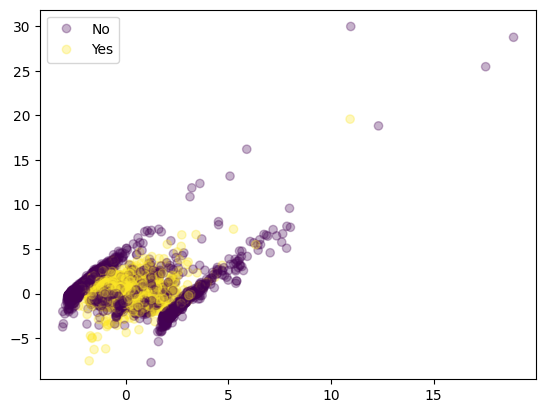

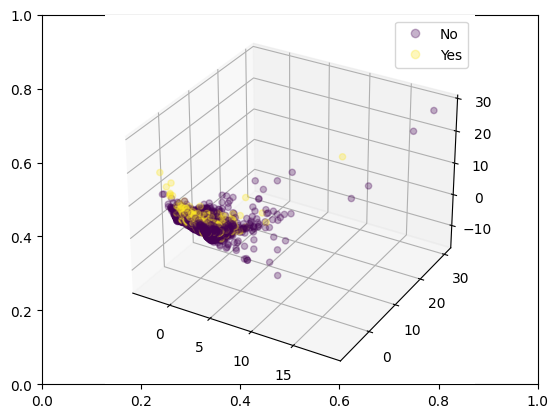

In [352]:
# YOUR CODE HERE
visualize_2pcs(X_reduced, y, 0, 1)
# YOUR CODE HERE
visualize_3pcs(X_reduced, y, 0, 1, 2)

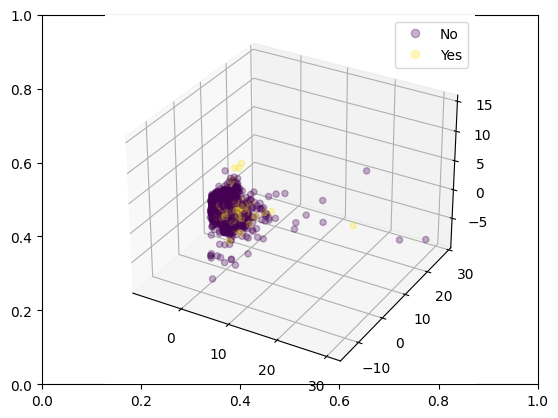

In [353]:
visualize_3pcs(X_reduced, y, 1, 2, 4)

The visualisations are not very promising for classification. It looks like the `Yes` values and `No` values are not forming distinct clusters! 

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [354]:
# YOUR CODE HERE (imports!)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
    if standardize==True: 
        model = make_pipeline(StandardScaler(), LogisticRegression(class_weight="balanced"))
    else: 
        model = make_pipeline(LogisticRegression(class_weight="balanced"))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Now apply the pipeline on the all the features `X` and review the performance

In [355]:
# YOUR CODE HERE
train(X, y, standardize=True)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

Adding standardization to the original data, `X` does make a difference in the F1-score - it is lower for the class 0 and higher for class 1. But for the `X_reduced` since it is already standardized, including standardization in the pipeline has no impact on the trained model performance, giving identical results. 

In [356]:
train(X, y, standardize=False)

              precision    recall  f1-score   support

           0       0.98      0.40      0.57       649
           1       0.47      0.99      0.64       351

    accuracy                           0.61      1000
   macro avg       0.73      0.70      0.61      1000
weighted avg       0.81      0.61      0.60      1000



In [357]:
# YOUR CODE HERE
train(X_reduced, y, standardize=True)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       649
           1       0.51      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.63      0.63      1000
weighted avg       0.66      0.65      0.66      1000



In [358]:
train(X_reduced, y, standardize=False)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       649
           1       0.51      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.63      0.63      1000
weighted avg       0.66      0.65      0.66      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    
    *Overall, there is a slight performance drop in accuracy when using the PCA features. PCA does lead to a parsimonious model, and therefore the training time of this model is going to be lower. Also it removes correlated variables in the model. The cons are that the principal components are not interpretable. Principal components need to be selected carefully based on the explained variance ratio.*

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different values of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [359]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [360]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

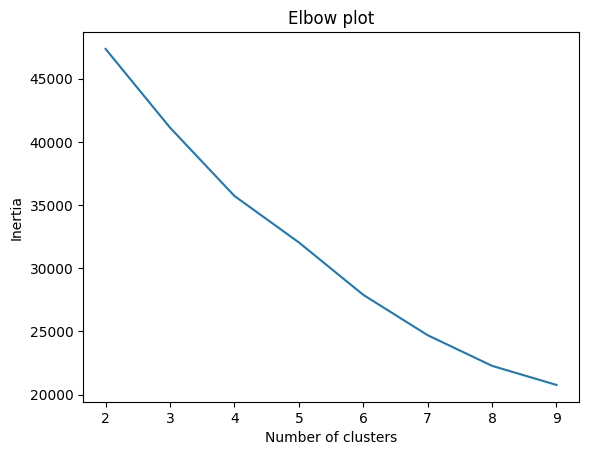

In [361]:
# YOUR CODE HERE
visualize_elbow(X=X_reduced, ks=range(2, 10))

4. What are the disadvantage to use the Elbow method? 

    *In the elbow method, the idea is to pick the number of clusters at the "elbow" such that the inertia decreases by a slower rate after this. But as can be seen in the above plot, there are several points when the slope decreases, like in k=4, 6 and 8 and so on. So it is not conclusive.*

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [362]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.2504544355696853
For n_clusters = 3 The average silhouette_score is : 0.25842829314759935
For n_clusters = 4 The average silhouette_score is : 0.27199356067232094
For n_clusters = 5 The average silhouette_score is : 0.2387262644551456
For n_clusters = 6 The average silhouette_score is : 0.24283571538693272
For n_clusters = 7 The average silhouette_score is : 0.24909820296536286
For n_clusters = 8 The average silhouette_score is : 0.266248725885661


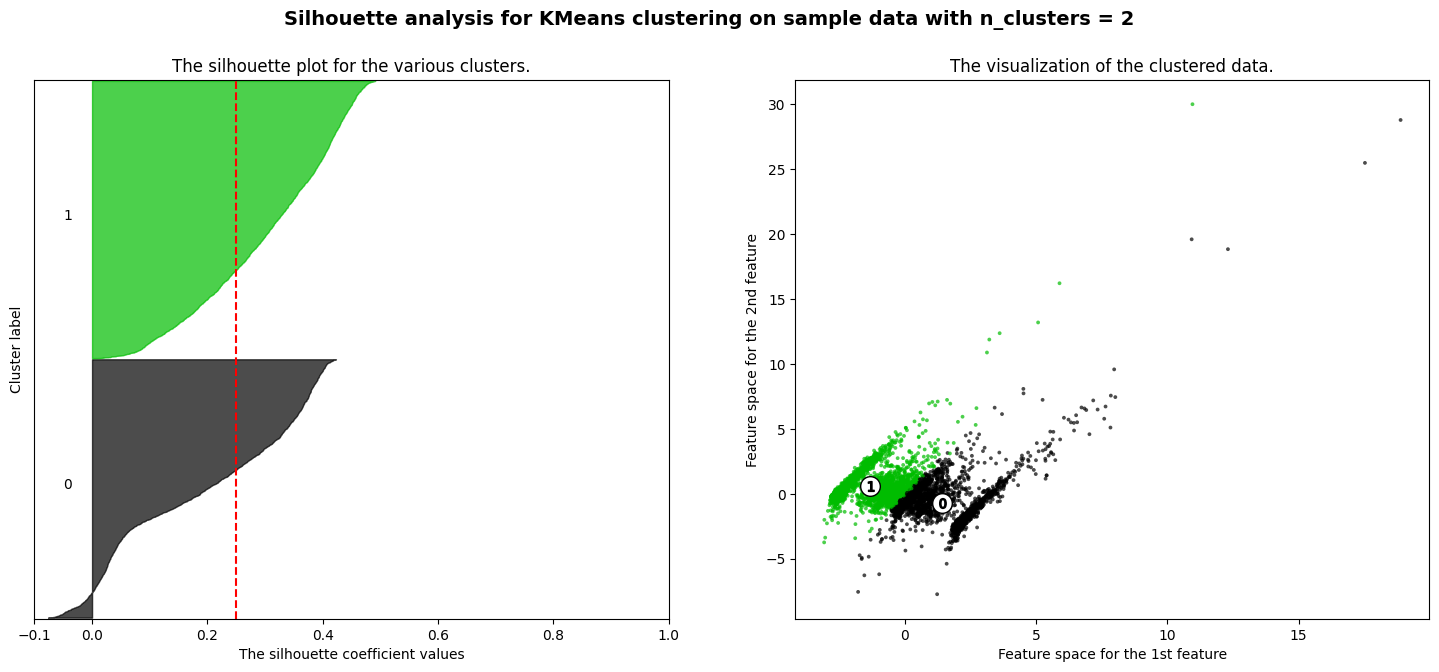

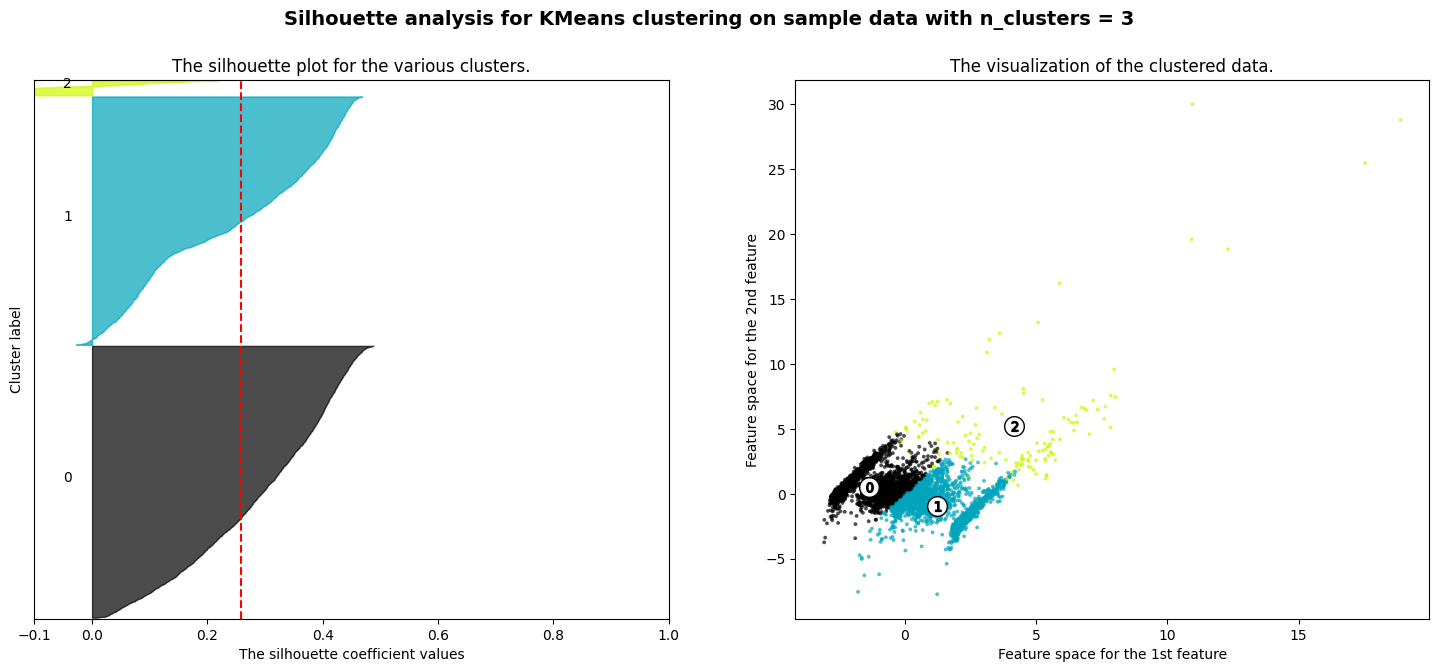

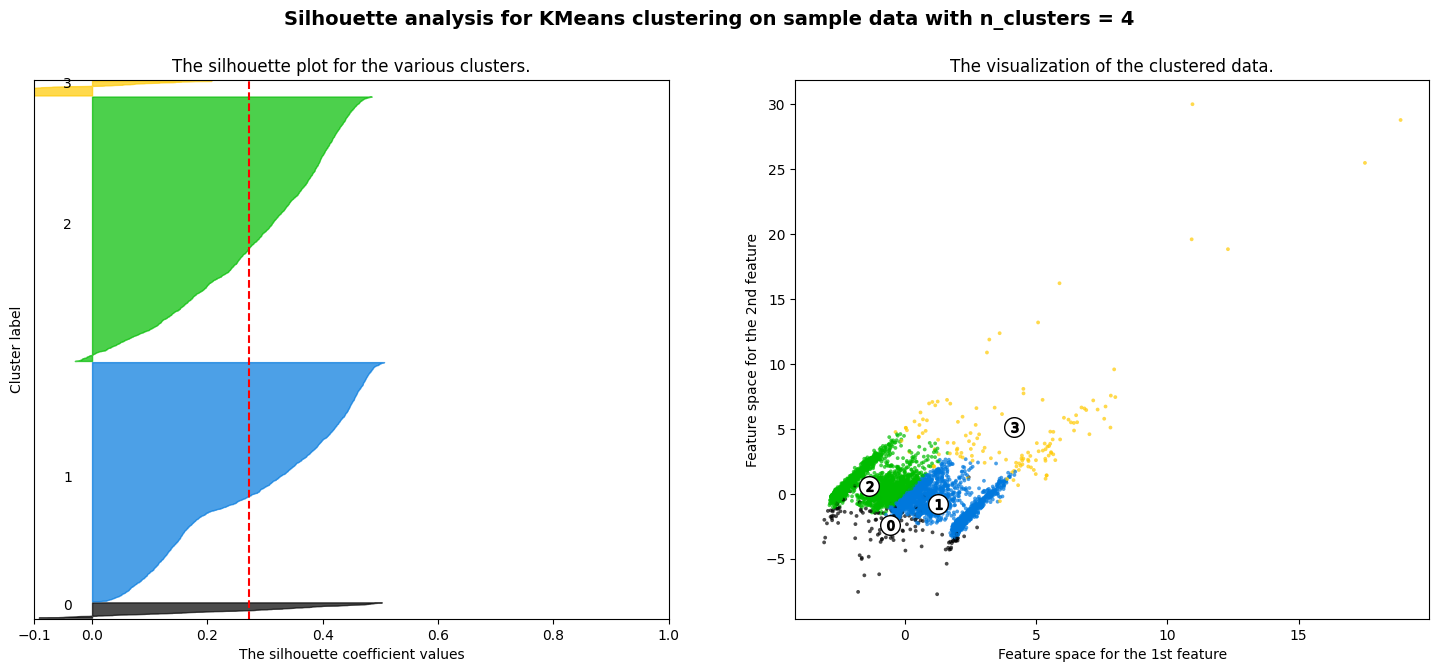

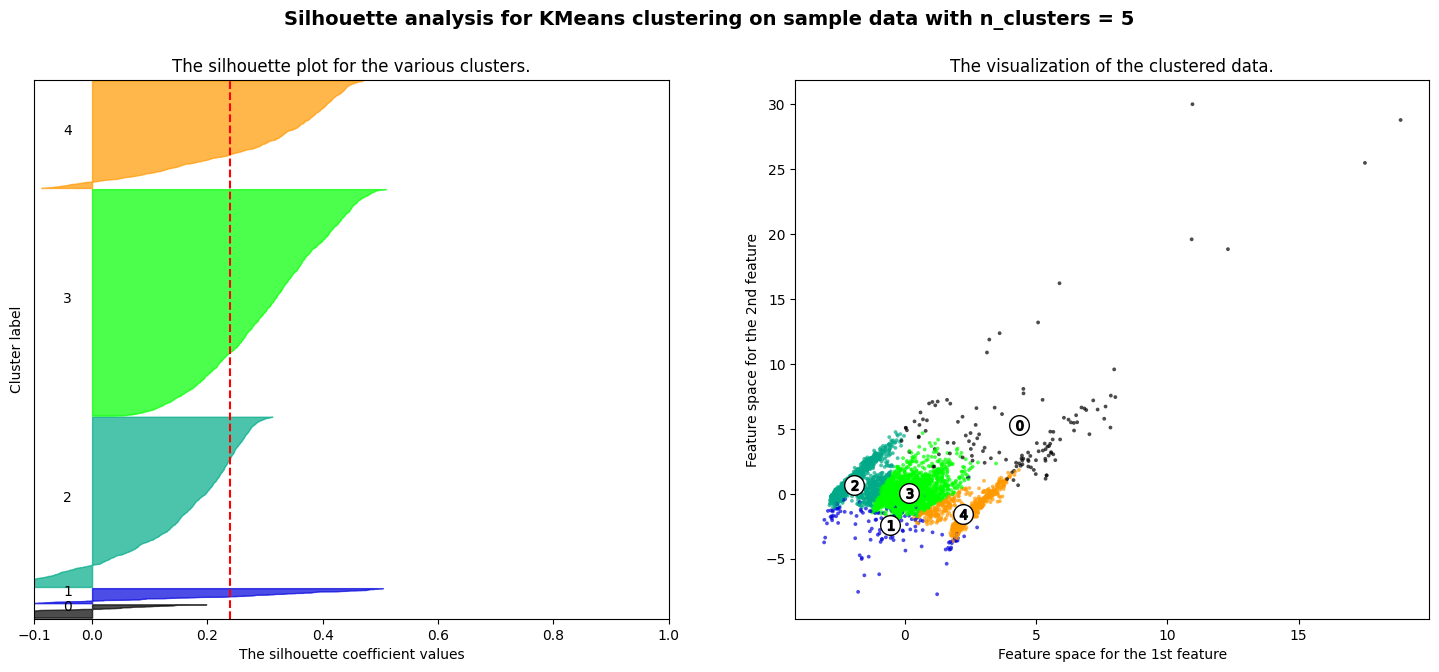

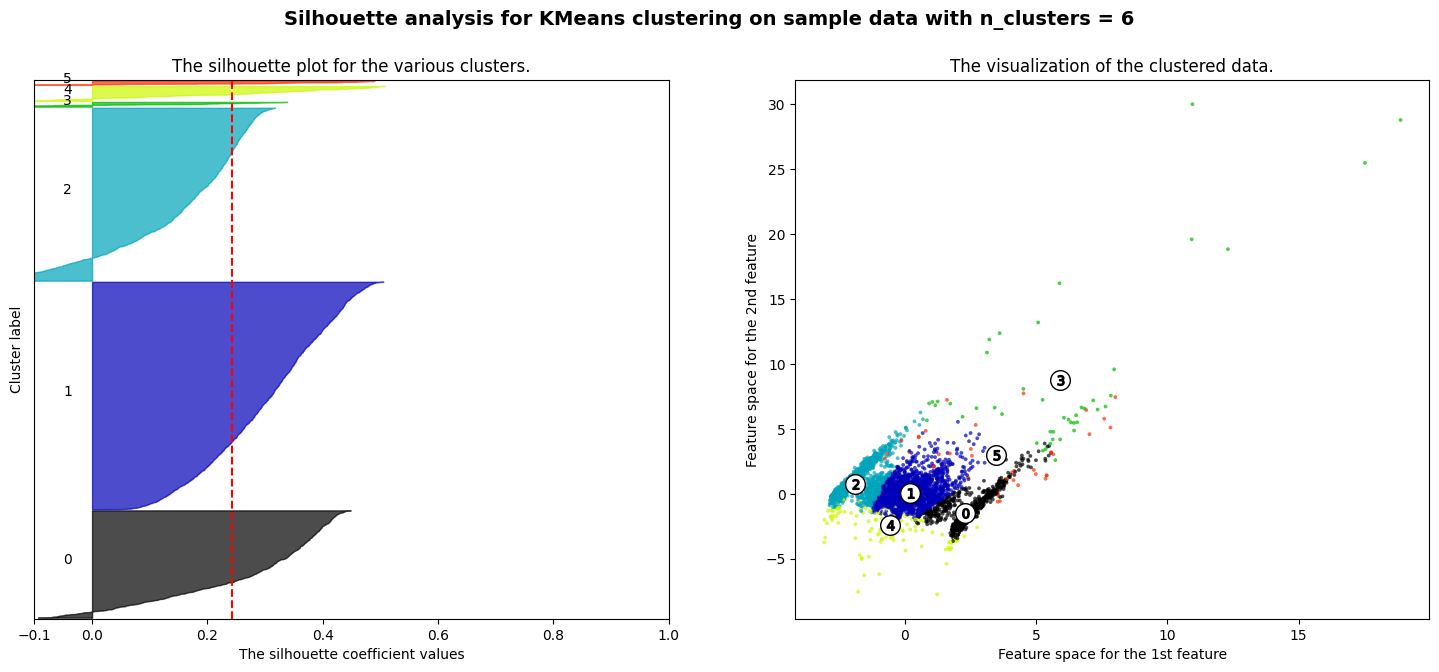

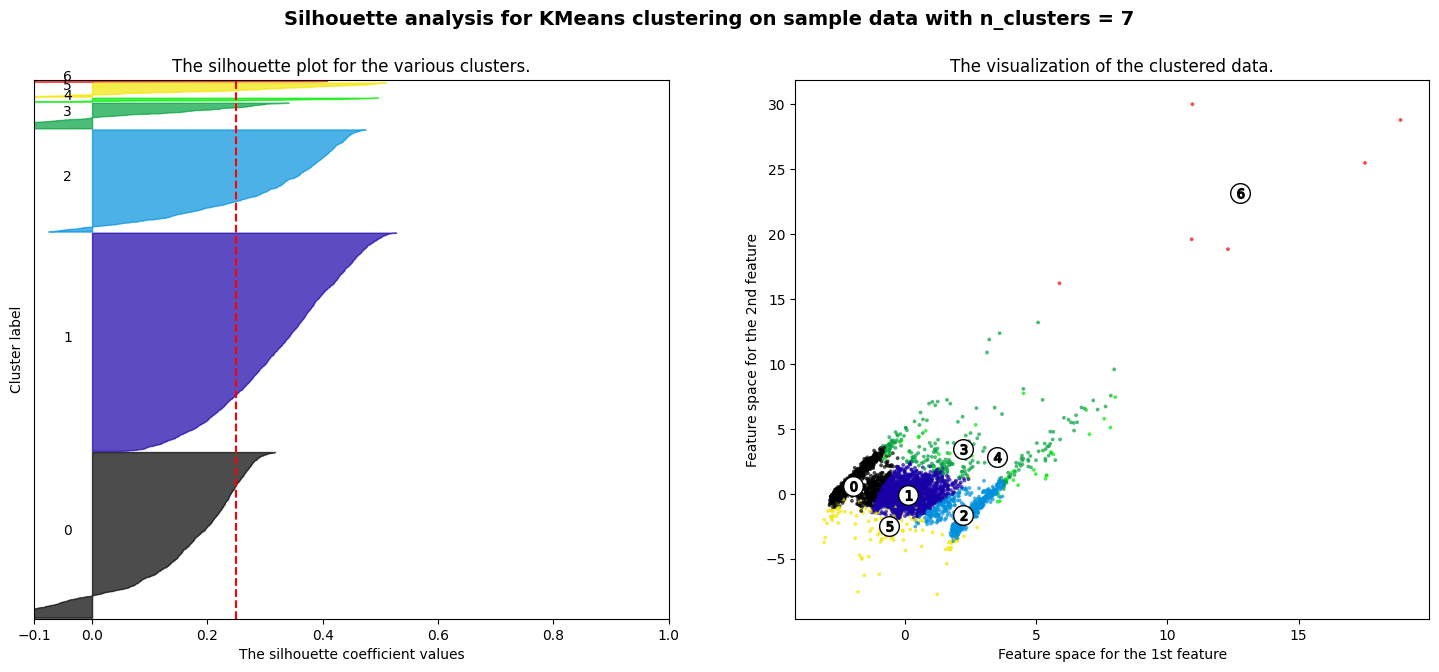

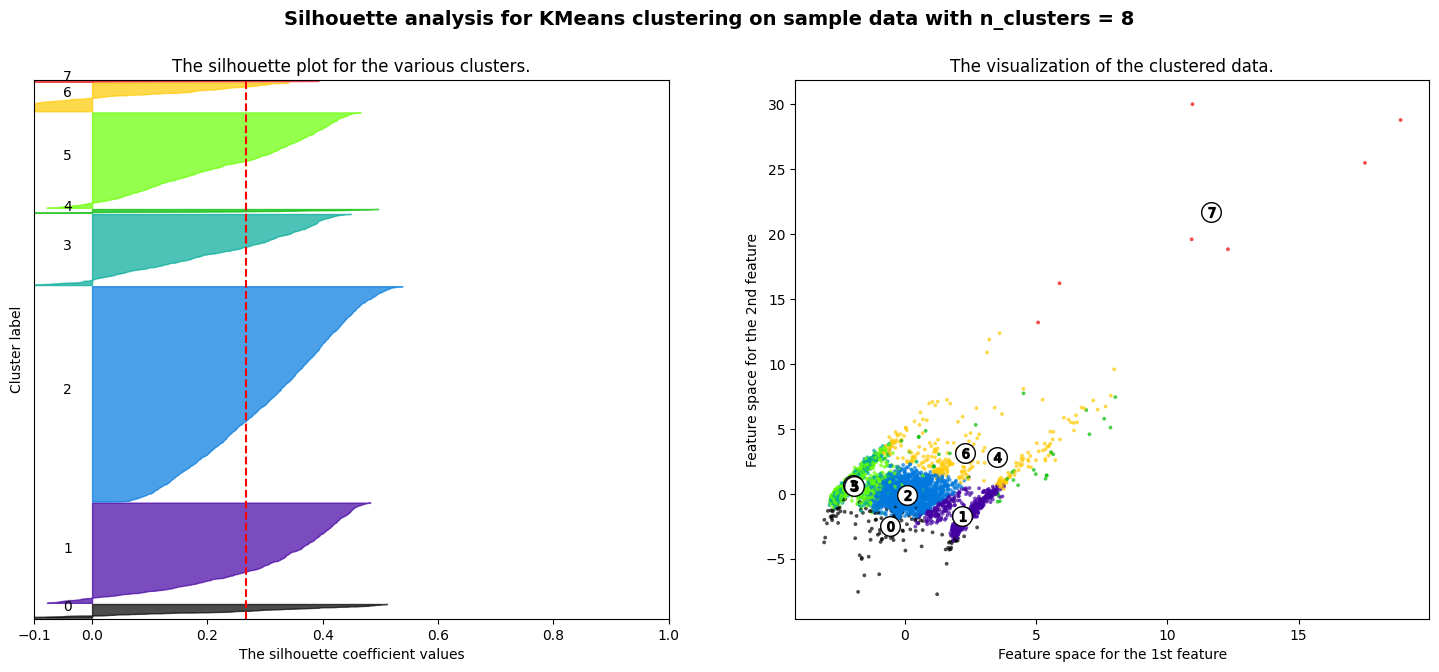

In [363]:
# YOUR CODE HERE
visualize_silhouette(max_clusters=8, X=X_reduced)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

The highest average silhouette value is for `n_clusters=4`, although it is very close to the rest of the clusters. 

In [364]:
# YOUR CODE HERE
km = KMeans(n_clusters=4, random_state=10)
km.fit(X_reduced)

KMeans(n_clusters=4, random_state=10)

7. What is the size of each cluster? 

In [365]:
import collections
frequency = collections.Counter(km.labels_)

print(dict(frequency))

{1: 2241, 2: 2478, 0: 144, 3: 137}


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [366]:
# YOUR CODE HERE
past['cluster_pca'] = km.labels_

In [367]:
past.describe()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.573727e+06,5.235286e+08,1.951080,1.327052,2.490234e+05,7.457600,7.426321,0.541953,0.893687,0.413592,...,0.213311,0.065900,0.162676,0.244012,0.169207,0.085550,0.343800,0.059343,1.143728,1.521600
std,1.161840e+06,5.998702e+07,1.324727,0.718266,6.920382e+05,11.883206,11.876266,0.565350,0.841036,0.772170,...,0.275556,0.172911,0.246050,0.289270,0.252342,0.191101,0.475023,0.153912,0.438141,0.601669
min,4.104000e+03,6.524181e+07,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.760491e+06,4.998498e+08,1.000000,1.000000,0.000000e+00,2.483750,2.480000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,5.830816e+06,5.343735e+08,1.750000,1.166667,3.626375e+03,4.440585,4.440000,0.500000,1.000000,0.222222,...,0.142857,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,5.875312e+06,5.616843e+08,2.308355,1.500000,2.071993e+05,7.620000,7.550000,0.858766,1.000000,0.632775,...,0.333333,0.040000,0.250000,0.363636,0.250000,0.090909,1.000000,0.041888,1.045996,2.000000
max,5.932538e+06,6.220262e+08,40.000000,28.000000,1.087537e+07,236.510000,236.510000,12.000000,28.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep business use cases in mind throughout all steps. 

    *The analysis is given below.*

Are the user journeys around a few products? How many unique products do we have? Turns out 5000!

In [395]:
past['product_id'].nunique()

5000

Do the users repeat? Yes, but not that many. 

*We need to understand how the user journey data is generated. Does each row have a single user-product combination? This is not very realistic because a user typically clicks on multiple products in their journey. For the purpose of the analysis here, we assume that each row is a unique user-product combination.*

In [396]:
past['user_id'].nunique()

4981

### Representation 
Out of the 4 clusters, clusters 1 and 2 have approx. 95% of the data points, with 50% in cluster 2, and 45% in cluster 1. 

,user_id
cluster_pca,
0,0.0288
1,0.4482
2,0.4956
3,0.0274


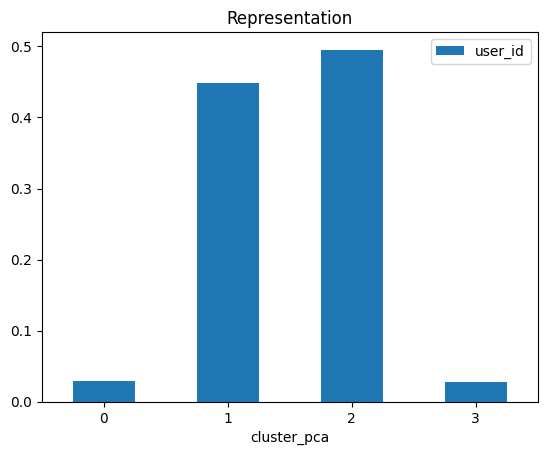

In [370]:
df = pd.DataFrame(past.groupby(['cluster_pca'])['user_id'].count()/past.shape[0])
ax = df.plot.bar(rot=0, title="Representation")
df

### Purchase Rate 
The purchase rate is around the same for both clusters 1 and 2 at 33-35%. These clusters have purchase rates close to the overall purchase rate of 34% which is expected, since their representation is close to 95% in the dataset. Cluster 3 with 3% representation, has a lower rate at 17% whereas cluster 0 with another 3% of data, has a higher rate at 42%. 

,Purchased?
cluster_pca,
0,0.423611
1,0.338688
2,0.353511
3,0.167883


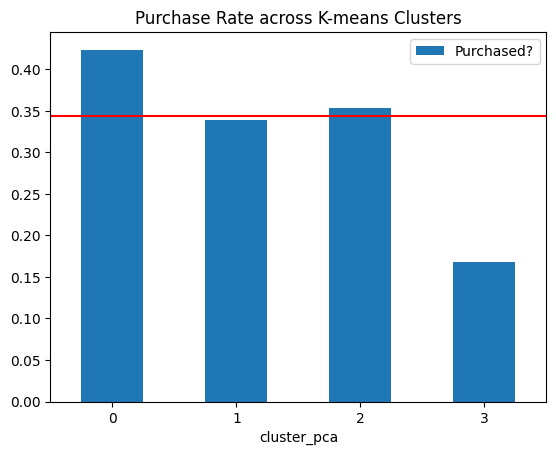

In [373]:
df = pd.DataFrame(past.groupby('cluster_pca')['Purchased?'].mean())
df.plot.bar(rot=0, title="Purchase Rate across K-means Clusters")
plt.axhline(y=past['Purchased?'].mean(), color='red')
df

### maxPrice (Price of product)
* maxPrice has a mean of 7.5. There are 34 rows with maxPrice = 0 that need to be investigated. How can user journey have maxPrice as 0?
* maxPrice has a right skewed distribution, with products with higher prices forming the right tail. 
* The distribution of maxPrice between user journeys that ended in a purchase and not, are very similar. 
* Breaking this down into clusters though reveals that cluster 0 customers were looking at and purchasing higher value products. This is seen in the mean maxPrice of cluster 0 at around 50-60 compared to the entire dataset of 7-8. 
* Although its representation is low, cluster 0 has a similar contribution to total maxPrice as cluster 1 and 2. 

In [375]:
import seaborn as sns 

In [384]:
past['maxPrice'].describe()

count    5000.000000
mean        7.457600
std        11.883206
min         0.000000
25%         2.483750
50%         4.440585
75%         7.620000
max       236.510000
Name: maxPrice, dtype: float64

In [387]:
past[(past['maxPrice'] == 0)]['user_id'].count()

34

<AxesSubplot: xlabel='maxPrice', ylabel='Density'>

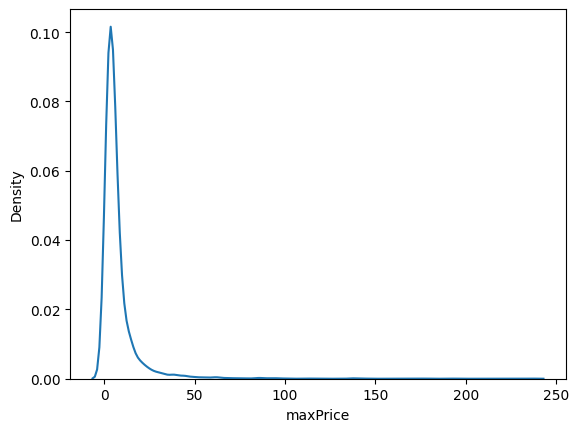

In [376]:
sns.kdeplot(data=past, x="maxPrice")

<AxesSubplot: xlabel='maxPrice', ylabel='Purchased?'>

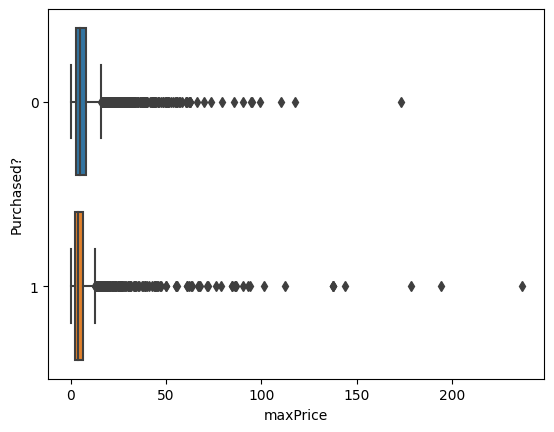

In [374]:
past['Purchased?'] = pd.Categorical(past['Purchased?'])
sns.boxplot(data=past, x="maxPrice", y="Purchased?")

<AxesSubplot: xlabel='maxPrice', ylabel='cluster_pca'>

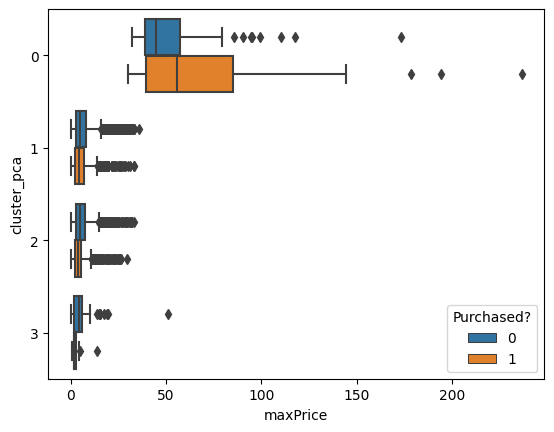

In [379]:
past['cluster_pca'] = pd.Categorical(past['cluster_pca'])
sns.boxplot(data=past, x="maxPrice", y="cluster_pca", hue="Purchased?")

,maxPrice
cluster_pca,
0,52.449906
1,6.672725
2,6.054200
3,5.215029


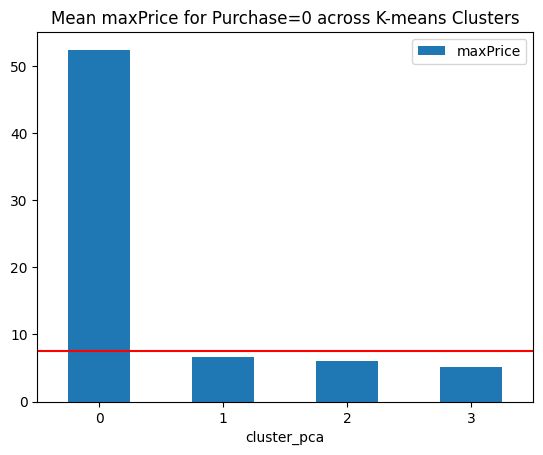

In [380]:
df = pd.DataFrame(past[(past['Purchased?']==0)].groupby(['cluster_pca'])['maxPrice'].mean())
df.plot.bar(rot=0, title="Mean maxPrice for Purchase=0 across K-means Clusters")
plt.axhline(y=past[(past['Purchased?'] == 0)]['maxPrice'].mean(), color='red')
df

,maxPrice
cluster_pca,
0,69.016617
1,5.708889
2,4.737795
3,2.563958


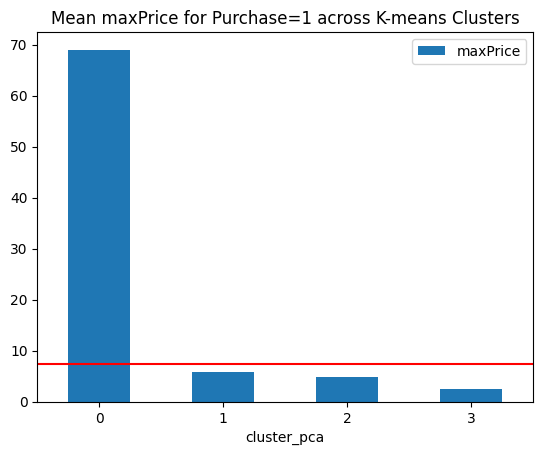

In [381]:
df = pd.DataFrame(past[(past['Purchased?']==1)].groupby(['cluster_pca'])['maxPrice'].mean())
df.plot.bar(rot=0, title="Mean maxPrice for Purchase=1 across K-means Clusters")
plt.axhline(y=past[(past['Purchased?'] == 1)]['maxPrice'].mean(), color='red')
df

,maxPrice
cluster_pca,
0,4210.013667
1,4333.046445
2,4150.308166
3,58.971033


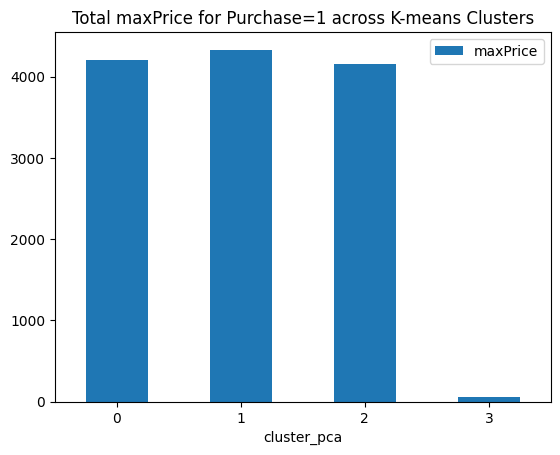

In [382]:
df = pd.DataFrame(past[(past['Purchased?']==1)].groupby(['cluster_pca'])['maxPrice'].sum())
df.plot.bar(rot=0, title="Total maxPrice for Purchase=1 across K-means Clusters")
df

### Online activity 


* Cluster 3 spend the most time on the online portal with the highest mean `InteractionTime`. 

Let us look at the individual events - viewing, adding or removing to the cart etc. 
* As expected cluster 3 also has the highest average `NumOfEventsInJourney`. These are customers who seem to be spending a lot of time on the portal and even getting to adding to the cart event with the highest average `NumCart` events, but they also have the highest `NumRemove`. Again we need to remember this cluster has a small representation at 3% and therefore these values could also be due to outliers. 
* We don't see any difference between clusters 1 and 2 in terms of the interation time and events. 

*So what is different between these two clusters: 1 & 2?*

In [389]:
past["interactionTime"].describe()

count    5.000000e+03
mean     2.490234e+05
std      6.920382e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.626375e+03
75%      2.071993e+05
max      1.087537e+07
Name: interactionTime, dtype: float64

In [390]:
past[(past["interactionTime"] == 0)]['user_id'].count()

1370

<AxesSubplot: xlabel='interactionTime', ylabel='Density'>

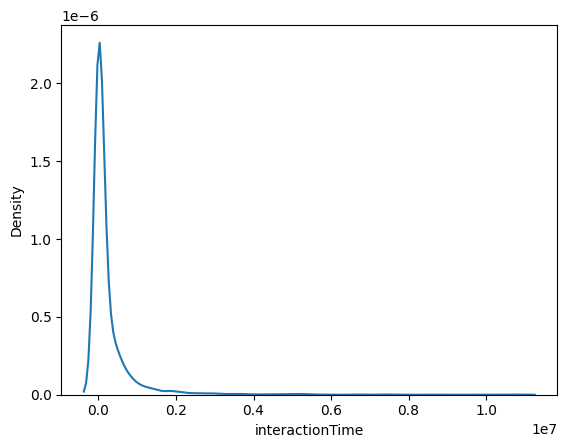

In [391]:
sns.kdeplot(data=past, x="interactionTime")

,interactionTime
cluster_pca,
0,9.631984e+04
1,2.054268e+05
2,1.811521e+05
3,2.350296e+06


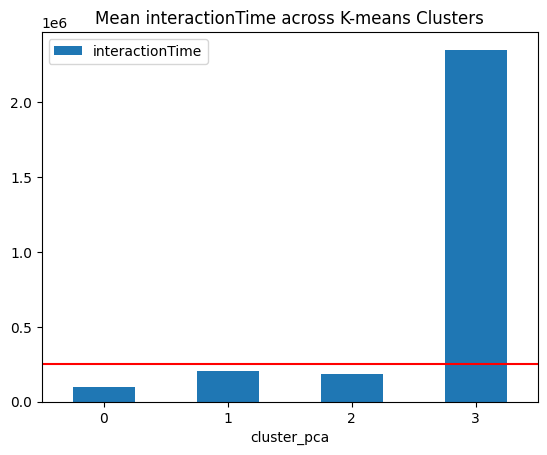

In [392]:
df = pd.DataFrame(past.groupby(['cluster_pca'])['interactionTime'].mean())
df.plot.bar(rot=0, title="Mean interactionTime across K-means Clusters")
plt.axhline(y=past['interactionTime'].mean(), color='red')
df

In [393]:
df = past.groupby('cluster_pca')[['NumOfEventsInJourney', 'NumSessions', 'NumCart', 'NumView', 'NumRemove']].mean()

<AxesSubplot: xlabel='cluster_pca'>

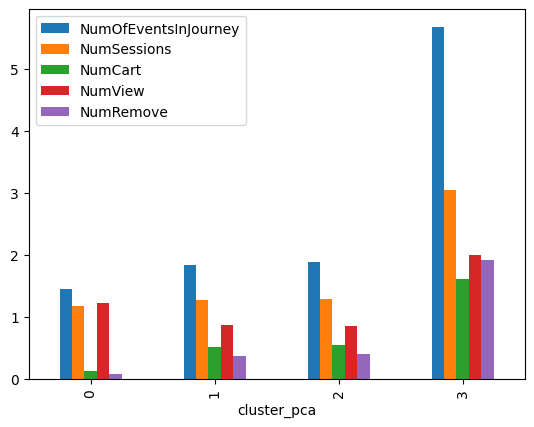

In [394]:
df.plot.bar()

### Time of purchase 

* The average value of the `2019` column for clusters 1, 2 and 3 is very different from `2020` column. 
* Cluster 1 & 3 have majority of their user journeys in 2020 whereas cluster 0 has majority of its journeys in 2019. 

<AxesSubplot: xlabel='cluster_pca'>

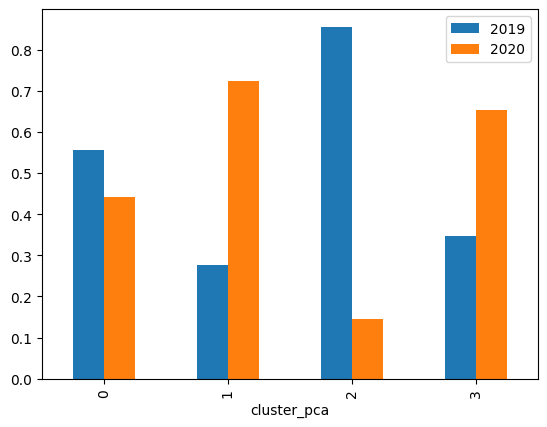

In [398]:
df = past.groupby('cluster_pca')[['2019', '2020']].agg('mean')
df.plot.bar()

When we look at the individual months it is clear that Cluster 2 starts at a high value in Oct 2019, and goes down by Feb 2020. The opposite trend is seen with cluster 1 and 2. We need to investigate why this is so. 

<AxesSubplot: xlabel='cluster_pca'>

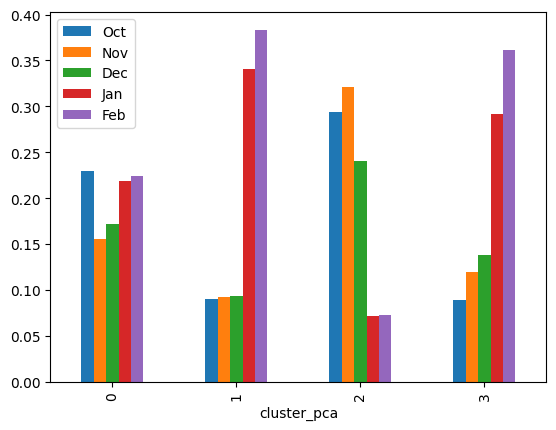

In [399]:
df = past.groupby('cluster_pca')[['Oct', 'Nov', 'Dec', 'Jan', 'Feb']].agg('mean')
df.plot.bar()

Day of the week and time of the day do not seem to be very different across clusters. 

<AxesSubplot: xlabel='cluster_pca'>

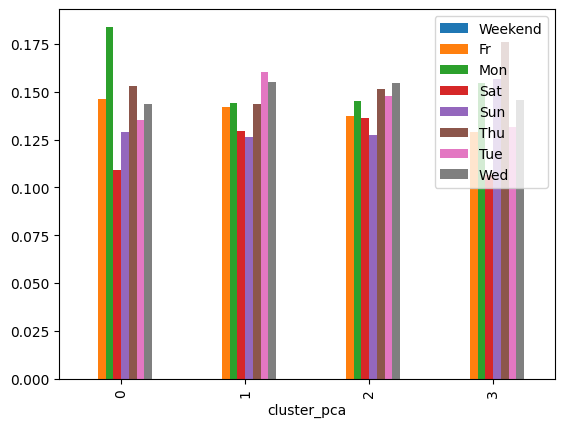

In [400]:
df = past.groupby('cluster_pca')[['Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']].mean()
df.plot.bar()

<AxesSubplot: xlabel='cluster_pca'>

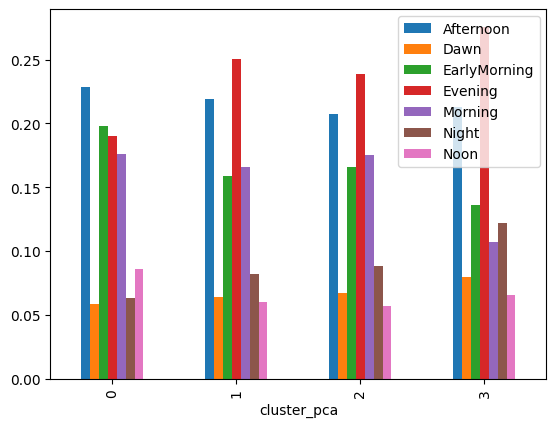

In [401]:
df = past.groupby('cluster_pca')[['Afternoon', 'Dawn', 'EarlyMorning', 'Evening', 'Morning', 'Night', 'Noon']].mean()
df.plot.bar()

### Summary for K-means Clusters  
* Cluster 0: This represents only 3% of the journeys, but has a high value in terms of `maxPrice` - so it is worth considering how to convert more of the customers in this cluster to make the high value purchases. The time of purchase for this cluster is also very different from the rest, and should be considered in targeting deals/promotions for this cluster. 
* Clusters 2 and 3: They represent 95% of the data together, with almost equal representation. The only difference is that Cluster 2 seems to have a higher `maxPrice` in 2019 and has a downward trend, whereas Cluster 3 has the opposite. This needs to be investigated further. This is where the second chunk of revenue is coming from, and efforts to add targetted promotions on these class of products needs to be put in.  
* Cluster 1: This represents 3% of customers who spend the maximum time on the portal but have a below-average purchase rate. Why are they not making the purchases? Are the recommendations not good enough for them? How can we attract this class of customers to move into cluster 2&3? 

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    K-means algorithm assumptions: 
    -Spherical clusters: variance of the distribution of each variable is spherical, and all variables have same variance
    -Equally sized clusters: each cluster has equal number of observations

    We have 2 clusters that represent 95% of data and other 2 with 5%. Looking at the 2d visualisation of the top 2 principal components we see that the data may not be spherical. Most of the purchases are happening in the centre yellow blob, and K-means ends up splitting this into 2 clusters (blue and green in the 2nd figure). 

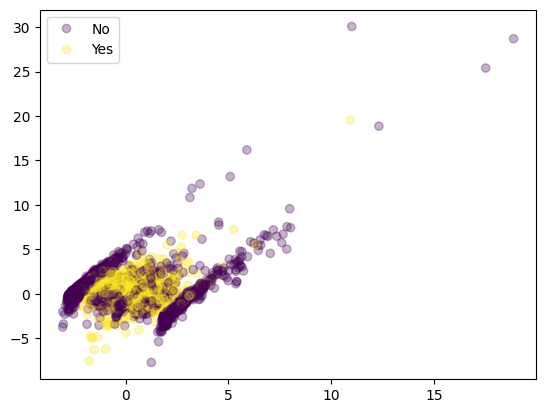

In [124]:
visualize_2pcs(X_reduced, y, 0, 1)

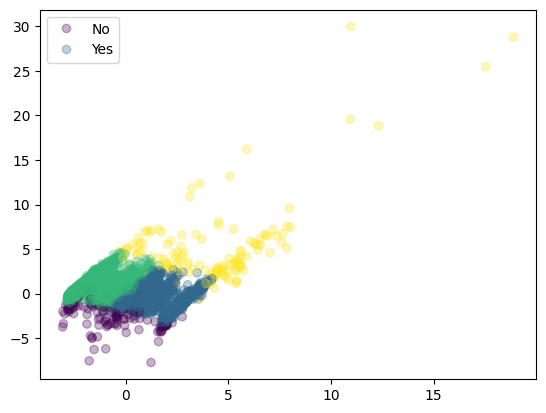

In [403]:
# reuse this function to show the clusters from k-means (ignore the yes/no legend)
visualize_2pcs(X_reduced, km.labels_, 0, 1)

### Option 2 for Clustering: DBSCAN 

In [405]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_reduced)
distances, indices = nbrs.kneighbors(X_reduced)
distances = np.sort(distances, axis=0)
distances = distances[:,1]


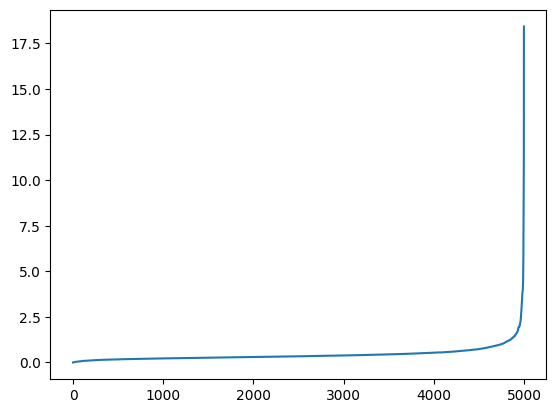

In [406]:
plt.plot(distances)

In [407]:
from sklearn.cluster import DBSCAN

for _eps in np.arange(0.5, 3, 0.1):
    db = DBSCAN(eps=_eps, min_samples=5).fit(X_reduced)
    labels = db.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print(f"eps {_eps}: {n_clusters_} clusters, {n_noise_} noise points")


eps 0.5: 26 clusters, 1843 noise points
eps 0.6: 8 clusters, 1204 noise points
eps 0.7: 11 clusters, 848 noise points
eps 0.7999999999999999: 6 clusters, 613 noise points
eps 0.8999999999999999: 4 clusters, 491 noise points
eps 0.9999999999999999: 7 clusters, 368 noise points
eps 1.0999999999999999: 6 clusters, 302 noise points
eps 1.1999999999999997: 3 clusters, 250 noise points
eps 1.2999999999999998: 2 clusters, 206 noise points
eps 1.4: 1 clusters, 178 noise points
eps 1.4999999999999998: 1 clusters, 152 noise points
eps 1.5999999999999996: 1 clusters, 132 noise points
eps 1.6999999999999997: 1 clusters, 123 noise points
eps 1.7999999999999998: 1 clusters, 113 noise points
eps 1.8999999999999997: 2 clusters, 104 noise points
eps 1.9999999999999996: 2 clusters, 88 noise points
eps 2.0999999999999996: 2 clusters, 74 noise points
eps 2.1999999999999997: 2 clusters, 67 noise points
eps 2.3: 2 clusters, 59 noise points
eps 2.3999999999999995: 1 clusters, 57 noise points
eps 2.4999999999

In [408]:
db = DBSCAN(eps=1.25, min_samples=5).fit(X_reduced)
labels = db.labels_
    
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f"{n_clusters_} clusters, {n_noise_} noise points")

2 clusters, 222 noise points


In [409]:
list(labels).count(0)

4773

In [410]:
list(labels).count(1)

5

DBSCAN algorithm ended up with a single large cluster, and the rest as a second cluster and noise points. It did not do any better than K-means. 

### Option 3 for Clustering: Gaussian Mixture 

### Representation

* The center blob of high purchase rate in the data is now separated into a nice cluster (cluster 2) that has 47% representation and around 60% purchase rate. 

In [411]:
from sklearn.mixture import GaussianMixture 

gm = GaussianMixture(n_components = 5, random_state=0).fit(X_reduced)

In [413]:
gm_labels = gm.predict(X_reduced)

In [414]:
frequency = collections.Counter(gm_labels)
print(dict(frequency))

{3: 376, 2: 2361, 0: 1229, 1: 769, 4: 265}


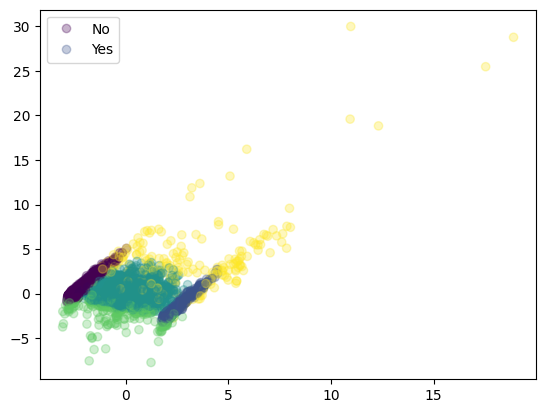

In [415]:
visualize_2pcs(X_reduced, gm_labels, 0, 1)

In [416]:
past['cluster_pca_gm'] = gm_labels

,user_id
cluster_pca_gm,
0,0.2458
1,0.1538
2,0.4722
3,0.0752
4,0.0530


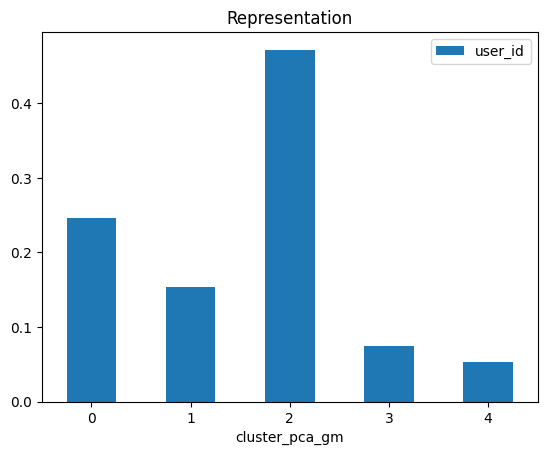

In [417]:
df = pd.DataFrame(past.groupby(['cluster_pca_gm'])['user_id'].count()/past.shape[0])
ax = df.plot.bar(rot=0, title="Representation")
df

,Purchased?
cluster_pca_gm,
0,0.061839
1,0.053316
2,0.590004
3,0.428191
4,0.181132


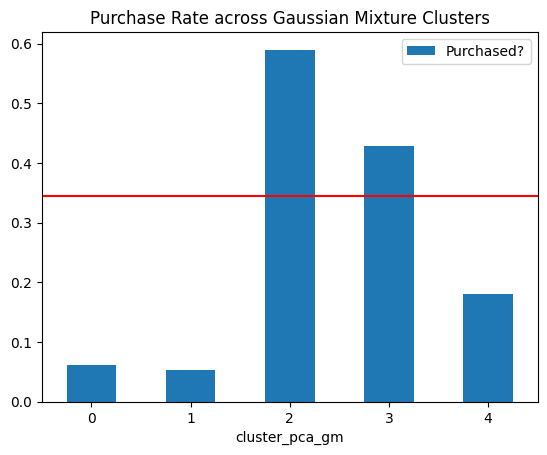

In [419]:
past['Purchased?'] = pd.to_numeric(past['Purchased?'])
df = pd.DataFrame(past.groupby('cluster_pca_gm')['Purchased?'].mean())
df.plot.bar(rot=0, title="Purchase Rate across Gaussian Mixture Clusters")
plt.axhline(y=past['Purchased?'].mean(), color='red')
df

### Value of Purchase

We still have a high value cluster in cluster 3. 

,maxPrice
cluster_pca_gm,
0,4.495994
1,5.380589
2,4.126748
3,38.353304
4,5.554110


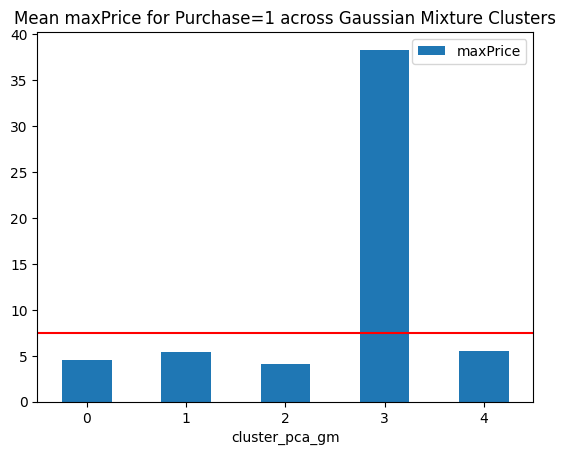

In [421]:
df = pd.DataFrame(past[(past['Purchased?']==1)].groupby(['cluster_pca_gm'])['maxPrice'].mean())
df.plot.bar(rot=0, title="Mean maxPrice for Purchase=1 across Gaussian Mixture Clusters")
plt.axhline(y=past[(past['Purchased?'] == 1)]['maxPrice'].mean(), color='red')
df

,maxPrice
cluster_pca_gm,
0,341.695563
1,220.604167
2,5748.560403
3,6174.881906
4,266.597271


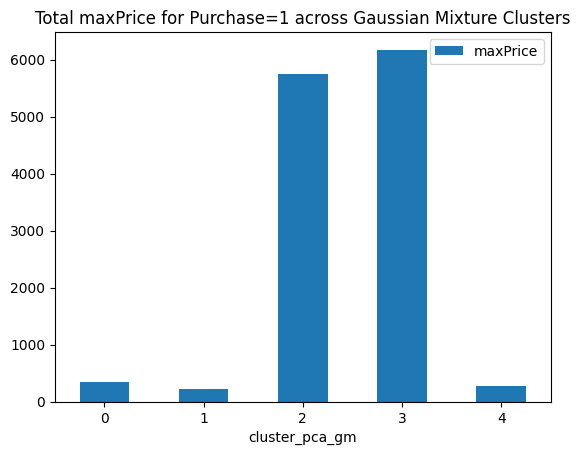

In [422]:
df = pd.DataFrame(past[(past['Purchased?']==1)].groupby(['cluster_pca_gm'])['maxPrice'].sum())
df.plot.bar(rot=0, title="Total maxPrice for Purchase=1 across Gaussian Mixture Clusters")
df

### Online activity

We also continue to have the cluster with low purchase rate and high online activity in cluster 4. 

,interactionTime
cluster_pca_gm,
0,9.889322e+04
1,1.005380e+05
2,2.634494e+05
3,8.738589e+04
4,1.476990e+06


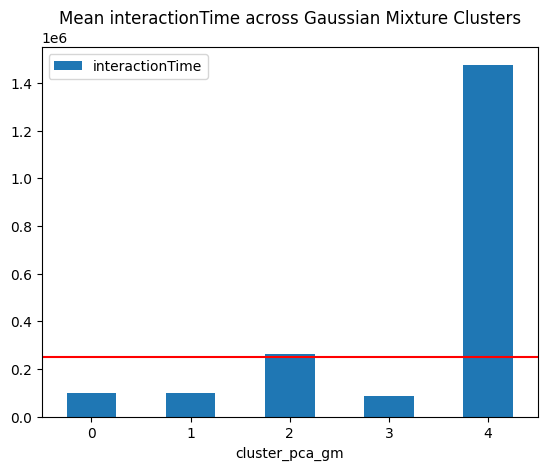

In [423]:
df = pd.DataFrame(past.groupby(['cluster_pca_gm'])['interactionTime'].mean())
df.plot.bar(rot=0, title="Mean interactionTime across Gaussian Mixture Clusters")
plt.axhline(y=past['interactionTime'].mean(), color='red')
df

### Time of Purchase 

We have successfully isolated cluster of customers that have an unexpected behaviour in terms of time of purchase. Cluster 0 did all their user journeys in 2019, whereas cluster 1 in 2020. This needs to be investigated further. 

<AxesSubplot: xlabel='cluster_pca_gm'>

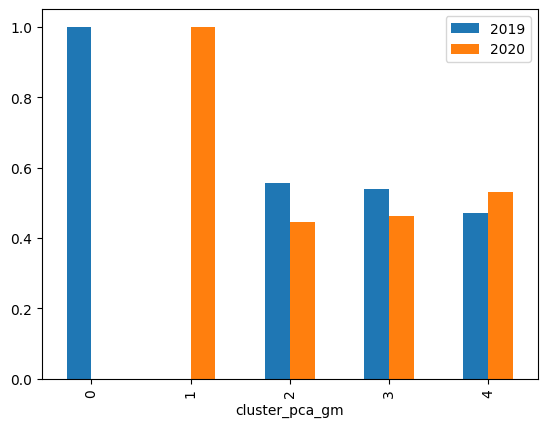

In [425]:
df = past.groupby('cluster_pca_gm')[['2019', '2020']].agg('mean')
df.plot.bar()

### Summary of Gaussian Mixture clusters

* Cluster 0 & 1: Needs to be investigated further for their time of user journey. 
* Cluster 2: medium value, high representation, high purchase rate. Need to focus on increasing their purchase rate. 
* Cluster 3: high value, low representation, high purchase rate. 
* Cluster 4: medium value, low representation, high online activity, low purchase rate. Convert them to purchases. 

Clusters 2, 3, 4 are similar to what we found in K-means. With Gaussian mixture, we have managed to isolate some problematic user journeys into clusters 0 and 1. 

11. Jot down recommendations or followup steps, detailing the reasons.

    Clustering resulted in 3 categories with different online activity and purchasing behaviours: 
    (1) High value customers who spent less time, and had low representation. They had a more stable online behaviour across the months, with some favorite days and time of the day. 
    (2) Medium value, majority of the user journeys, with highest purchase rate. 
    (3) Medium value, low representation, but highest online presence. 

    Each of these segments needs to targetted differently such that the portal provides them what they are looking for. So further analysis should look into individual products that ended up in a purchase and those that did not. Also consider, whether the recommendations provided on the portal worked for the customers in each segment or not. 

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [262]:
# YOUR CODE HERE
new = pd.read_csv('../dat/new.csv.gz')


In [263]:
assert new.shape == (30091, 5)

In [264]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

    *The number of datapoints in the training set (past) is relatively small at 5000, while the test set is quite large (30091). The training set has more features (37) than in the test set (5).*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [272]:
# YOUR CODE HERE
np.intersect1d(np.array(past['product_id']), np.array(new['product_id']))

array([], dtype=int64)

There are no product ids in both the training and test datasets. 

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [280]:
# YOUR CODE HERE # ~.344
new['Purchased?'].mean()

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [ ]:
# YOUR CODE HERE


In [ ]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [ ]:
# YOUR CODE HERE

7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [ ]:
# YOUR CODE HERE

In [ ]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [ ]:
# YOUR CODE HERE

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [ ]:
semi_sup_preds = # YOUR CODE HERE

In [ ]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [ ]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [ ]:
print(classification_report(y_test, y_pred))

    *YOUR ANSWER HERE*

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)